# A. Import Library

Pada tahap ini, kita akan mengimport seluruh library python yang diperlukan dalam pengembangan projek

In [208]:
# Upload file dengan google colab
from google.colab import userdata
import os
import random
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# B. Data Loading



Pada tahap, kita akan mengambil dataset dari luar (Kaggle) yakni Dataset Students-Performance yang diupload oleh Rabie El Kharoua

In [209]:
!kaggle datasets download -d rabieelkharoua/students-performance-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
students-performance-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Selanjutnya, kita akan mengekstrak file zip dan mengambil dataset dalam format csv dan disimpan pada variabel dataframe df_student

In [210]:
! unzip "students-performance-dataset.zip"

Archive:  students-performance-dataset.zip
replace Student_performance_data _.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [211]:
df_students = pd.read_csv('/content/Student_performance_data _.csv')

Selanjutnya, kita melihat isi dari dataset secara sekilas dengan `.head()` dan ukuran dari dataset dengan `.shape`

In [212]:
print(df_students.shape)
df_students.head(100)

(2392, 15)


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1096,16,1,2,3,19.278320,29,0,3,0,0,0,1,0.732908,4.0
96,1097,16,1,1,1,12.831594,29,0,4,0,0,1,0,0.965482,4.0
97,1098,18,0,0,2,0.468659,5,0,2,0,1,0,0,2.555233,2.0
98,1099,16,0,0,3,8.603518,25,0,2,1,0,1,1,0.744322,4.0


Dari tabel hasil diatas terdapat 2392 baris dan 15 kolom pada dataset

# C. Exploratory Data Analysis

## Deskripsi Variabel

Berikut adalah arti dari variabel yang digunakan dalam dataset:
#### StudentID
StudentID: Pengenal unik yang diberikan kepada setiap siswa (1001 hingga 3392).
#### Detail Demografis
1. Age: Usia siswa berkisar antara 15 hingga 18 tahun.
2. Gender: Jenis kelamin siswa, di mana 0 mewakili Pria dan 1 mewakili Wanita.
3. Ethnicity: Etnisitas siswa, dikodekan sebagai berikut:
0: Kaukasia
1: Afrika-Amerika
2: Asia
3: Lainnya
4. ParentalEducation: Tingkat pendidikan orang tua, dikodekan sebagai berikut:
0: Tidak ada
1: Sekolah Menengah Atas
2: Beberapa Perguruan Tinggi
3: Sarjana
4: Lebih tinggi

#### Kebiasaan Belajar
1. StudyTimeWeekly: Waktu belajar mingguan dalam jam, mulai dari 0 hingga 20.
2. Absences: Jumlah ketidakhadiran selama tahun ajaran, mulai dari 0 hingga 30.
3. Tutoring: Status bimbingan belajar, di mana 0 menunjukkan Tidak dan 1 menunjukkan Ya.

#### Keterlibatan Orang Tua
ParentalSupport: Tingkat dukungan orang tua, dengan kode sebagai berikut:
0: Tidak ada
1: Rendah
2: Sedang
3: Tinggi
4: Sangat Tinggi

#### Kegiatan Ekstrakurikuler
Extracurricular: Partisipasi dalam kegiatan ekstrakurikuler, di mana 0 menunjukkan Tidak dan 1 menunjukkan Ya.
Sports: Partisipasi dalam olahraga, di mana 0 menunjukkan Tidak dan 1 menunjukkan Ya.
Music: Partisipasi dalam kegiatan musik, di mana 0 menunjukkan Tidak dan 1 menunjukkan Ya.
Volunteering: Partisipasi dalam kegiatan sukarela, di mana 0 menunjukkan Tidak dan 1 menunjukkan Ya.

#### Kinerja Akademik
GPA: Indeks Prestasi Kumulatif dengan skala dari 2.0 hingga 4.0, yang dipengaruhi oleh kebiasaan belajar, keterlibatan orang tua, dan kegiatan ekstrakurikuler.

#### Variabel Target: GradeClass
GradeClass: Klasifikasi nilai siswa berdasarkan IPK:
0: 'A' (IPK >= 3,5)
2: 'C' (2.5 <= IPK < 3.0)
1: 'B' (3.0 <= IPK < 3.5)
3: 'D' (2.0 <= IPK < 2.5)
4: 'F' (IPK < 2.0)

Selanjutnya, kita akan menampilkan informasi dataset siswa

In [213]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


Dari hasil yang ditampilkan, terdapat 12 variabel bertipe int64 dan 3 variabel bertipe fload64

Langkah selanjutnya, kita tampilkan deskripsi dataset siswa

In [214]:
df_students.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


Dari hasil tersebut, dapat dilihat ringkasan statistik seperti jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), nilai maksimum (max), dan persentil (25%, 50%, 75%) dari setiap kolom pada datafrmae siswa

###Menangani Missing Value

Pada tahap ini kita akan mengecek data yang tidak valid pada dataset

In [215]:
#cek nilai kosong
pd.DataFrame({'Nilai yang Kosong':df_students.isna().sum()})

,Nilai yang Kosong
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


Dari hasil yang ditampilkan, data tidak memiliki nilai kosong (null) pada setiap kolom dataset

### Memeriksa Duplikasi Data

In [216]:
#Perika data yang ganda
print(f'Jumlah data yang ganda: {df_students.duplicated().sum()}')

Jumlah data yang ganda: 0


Hasil yang ditampilkan adalah 0, dengan demikian data tidak ada yang ganda (dupikat)

### Konversi nilai numerik kategorikal ke objek(string)

Langkah selanjutnya, karena dataset kita tipe kategorikal sudah dalam bentuk nilai numerik, maka kita perlu membuat fungsi konversi nilai number kategorikal ke objek (string). Tujuan dari langkah ini yaitu untuk menampilkan label fitur visualisasi dalam proses analisis data dengan teknik *Univariate EDA* dan *Multivariate EDA*.

In [217]:
# Menonaktifkan peringatan terkait downcasting
pd.set_option('future.no_silent_downcasting', True)

# Mengganti nilai number kategori ke String Keterangan
def konversi_numerik_to_objek ():
  df_students['Gender'] = df_students['Gender'].replace({1: 'Wanita', 0: 'Pria'})
  df_students['Extracurricular'] = df_students['Extracurricular'].replace({1:'Yes', 0:'No'})
  df_students['Tutoring'] = df_students['Tutoring'].replace({1: 'Yes', 0: 'No'})
  df_students['Music'] = df_students['Music'].replace({1: 'Yes', 0: 'No'})
  df_students['Sports'] = df_students['Sports'].replace({1: 'Yes', 0: 'No'})
  df_students['Volunteering'] = df_students['Volunteering'].replace({1: 'Yes', 0: 'No'})
  df_students['ParentalSupport'] = df_students['ParentalSupport'].replace({4: 'Very High', 3: 'High', 2: 'Moderate', 1: 'Low', 0: 'None'})
  df_students['GradeClass'] = df_students['GradeClass'].replace({4.0: 'Grade F', 3.0: 'Grade D', 2.0: 'Grade C', 1.0: 'Grade B', 0.0: 'Grade A'})

Berikutnya kita akan memanggil fungsi konversi numerik ke objek(string) dan menampilkan dataset dengan fungsi `head()`

In [218]:
#Memanggil fungsi konversi numerik ke objek(string)
konversi_numerik_to_objek()

#menampilkan datasetd dengan fungsi head()
df_students.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Wanita,0,2,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,Grade C
1,1002,18,Pria,0,1,15.408756,0,No,Low,No,No,No,No,3.042915,Grade B
2,1003,15,Pria,2,3,4.210570,26,No,Moderate,No,No,No,No,0.112602,Grade F
3,1004,17,Wanita,0,3,10.028829,14,No,High,Yes,No,No,No,2.054218,Grade D
4,1005,17,Wanita,0,2,4.672495,17,Yes,High,No,No,No,No,1.288061,Grade F


## Univariate Analysis EDA

#### 1. Membagi variabel-variabel yang ada menjadi 2 kategori, yaitu kategori numerikal dan kategori kategorical

In [219]:
# Menuliskan seluruh nama kolom numerikal
kolom_data_numerikal = ["Age", "StudyTimeWeekly", "Absences", "GPA"]
# Menuliskan seluruh nama kolom numerikal
kolom_data_kategorical = ["Gender", "Ethnicity", "ParentalEducation", "Tutoring", "ParentalSupport", "Extracurricular", "Sports", "Music", "Volunteering", "GradeClass"]

#### 2. Melihat nilai-nilai pada kolom kategorikal

In [220]:
# Menghitung jumlah nilai yang unik/berbeda dari masing-masing variabel pada kolom kategorikal
jumlah_unik = df_students[kolom_data_kategorical].nunique()

# Menampilkan nilai yang unik/berbeda dari masing-masing variabel pada kolom kategorikal
nilai_unik = df_students[kolom_data_kategorical].apply(lambda x: sorted(x.unique()))

# Menampilkan hasil dalam bentuk DataFrame
pd.DataFrame({"Total Nilai Berbeda": jumlah_unik, "Nilai-Nilai": nilai_unik})

,Total Nilai Berbeda,Nilai-Nilai
Gender,2,"[Pria, Wanita]"
Ethnicity,4,"[0, 1, 2, 3]"
ParentalEducation,5,"[0, 1, 2, 3, 4]"
Tutoring,2,"[No, Yes]"
ParentalSupport,5,"[High, Low, Moderate, None, Very High]"
Extracurricular,2,"[No, Yes]"
Sports,2,"[No, Yes]"
Music,2,"[No, Yes]"
Volunteering,2,"[No, Yes]"
GradeClass,5,"[Grade A, Grade B, Grade C, Grade D, Grade F]"


Dapat dilihat pada tabel nilai berbeda pada:
1. Kolom gender = 2;
2. Kolom Etnicity = 4;
3. Kolom ParentalEducation = 5;
4. Kolom Tutoring = 2;
5. Kolom ParentalSupport = 5;
6. Kolom Extracurricular = 2;
7. Kolom Sports = 2;
8. Kolom Music = 2;
9. Kolom Volunteering = 2;
10. Kolom GradeClass(Variabel Target) = 5;

#### 3. Menampilkan pesebaran data kolom kategorikal dalam bentuk grafik boxplot


Pada tahap ini, kita akan membuat visualisasi data kategorikal dalam bentuk grafik dengan menggunakan library python `matplotlib`

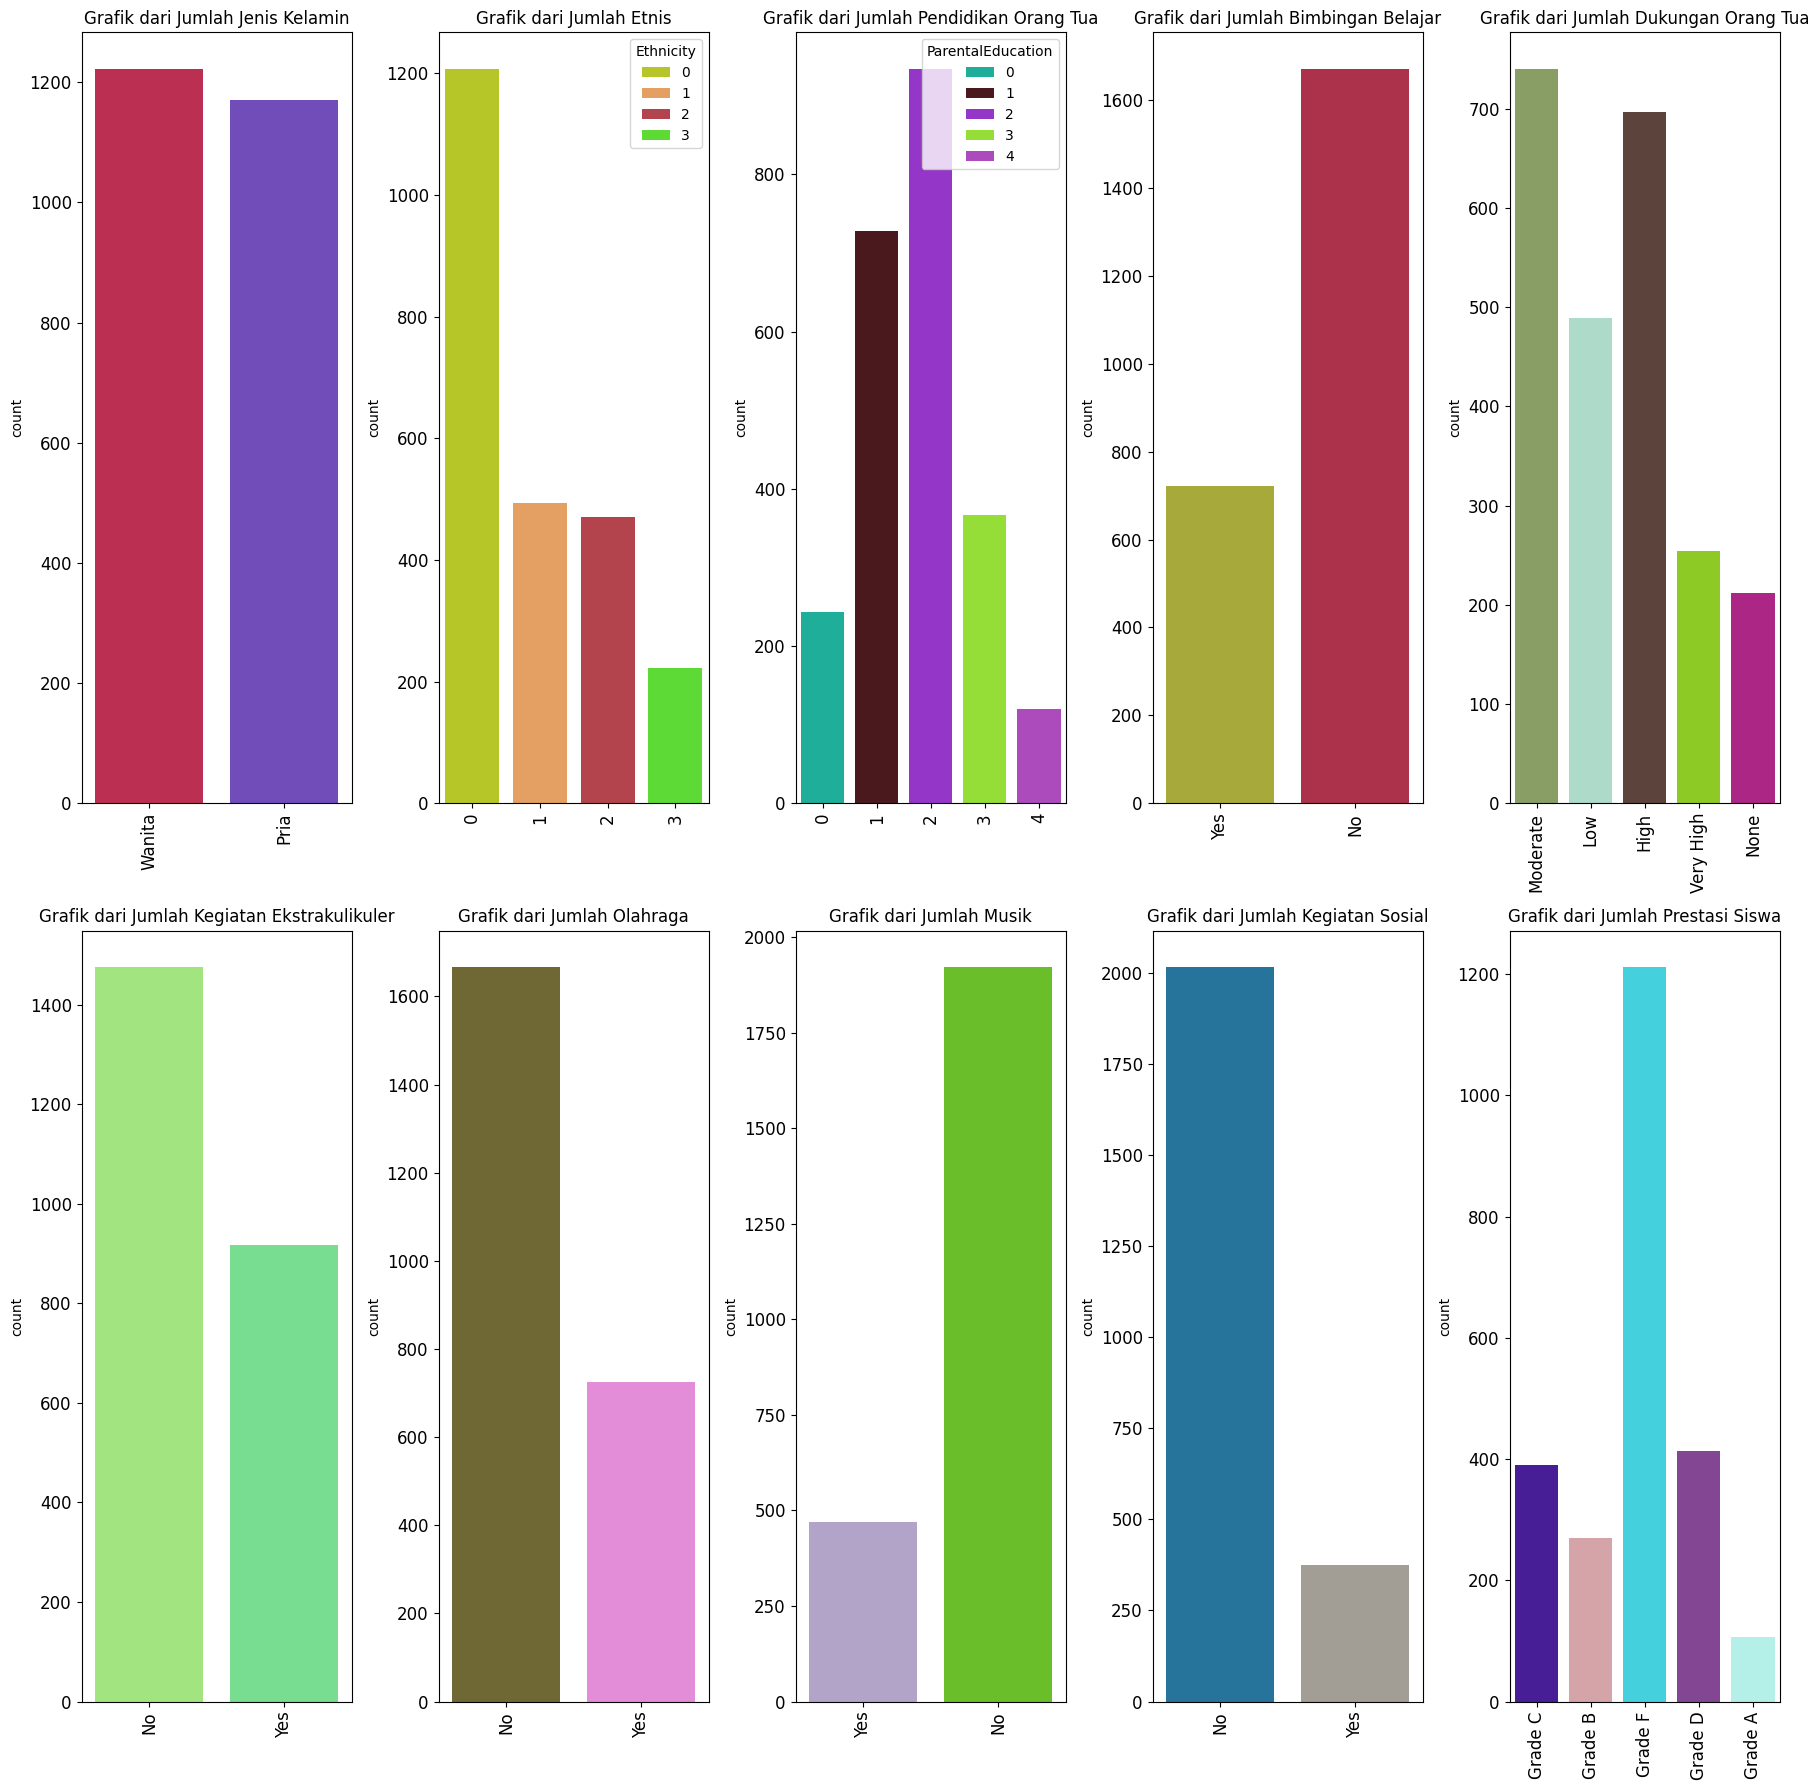

In [221]:
# Membentuk plot dengan subplot sejumlah 9 berukuran 3 x 3
fig, axes = plt.subplots(2, 5, figsize = (18, 18))

# Mengubah array multi dimensi menjadi array 1 dimensi
axes = axes.flatten()

# Fungsi untuk menghasilkan palet warna acak
def random_palette(n_colors):
    return ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n_colors)]

# Memberikan keterangan kolom-kolom kategorikal yang akan digunakan
keterangan_kolom_kategorikal = [ "Jenis Kelamin",
                                "Etnis",
                                "Pendidikan Orang Tua",
                                "Bimbingan Belajar",
                                "Dukungan Orang Tua",
                                "Kegiatan Ekstrakulikuler",
                                "Olahraga",
                                "Musik",
                                "Kegiatan Sosial",
                                "Prestasi Siswa"]

# Panggil fungsi numerik to objek
konversi_numerik_to_objek()

# Membentuk chart jumlah dalam bentuk bar char untuk masing-masing kolom
for i, kolom in enumerate(df_students[kolom_data_kategorical].columns):
    unique_values = df_students[kolom].nunique()  # Hitung jumlah kategori unik
    palette = random_palette(unique_values)  # Palet warna acak
    sns.countplot(x=kolom, data=df_students, ax = axes[i], hue = kolom, palette=palette)
    #sns.countplot(x = kolom, data = df_students, ax = axes[i], hue = kolom)

    # Menambahkan judul untuk masing-masing chart
    judul = "\n".join(textwrap.wrap(f"Grafik dari Jumlah {keterangan_kolom_kategorikal[i]}", width = 50))
    axes[i].set_title(judul)
    axes[i].title.set_size(12)

    # Mengatur label x
    axes[i].tick_params(axis = "x", labelrotation = 90)
    axes[i].tick_params(axis = "both", which = "major", labelsize = 12)
    axes[i].set_xlabel("")

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()


# Menampilkan plot
plt.show()

Berdasarkan grafik data kategorikal yang ditampilkan, dapat dilihat bahwa:
1. Grafik jenis kelamin, menunjukan jumlah merata antara laki-laki dan perempuan.
2. Grafik Etnis, menunjukan mayoritas siswa berasal dari etnis kaukasia.
3. Grafisk pendidikan orangtua, menunjukan mayoritas pendidikan orang tua yakni pensisikan tinggi dan sarjana
4. Grafik bimbingan belajar, menunjukan mayoritas siswa tidak mengikuti bimbingan belajar.
5. Grafik dukungan orang tua, menunjukan mayoritas dukungan orang tua berada di level sdang dan tinggi.
6. Grafik Ekstrakulikuler(EKtrakulikuler, Olahraga, Musik dan Sukrelawan), menujukan rendahnya minat siswa pada kegiatan diluar sekolah.

#### 4. Menampilkan pesebaran data kolom numerikal dalam bentuk grafik boxplot

Pada tahap ini, kita akan membuat visualisasi data numerikal dalam bentuk grafik dengan menggunakan library python `matplotlib`

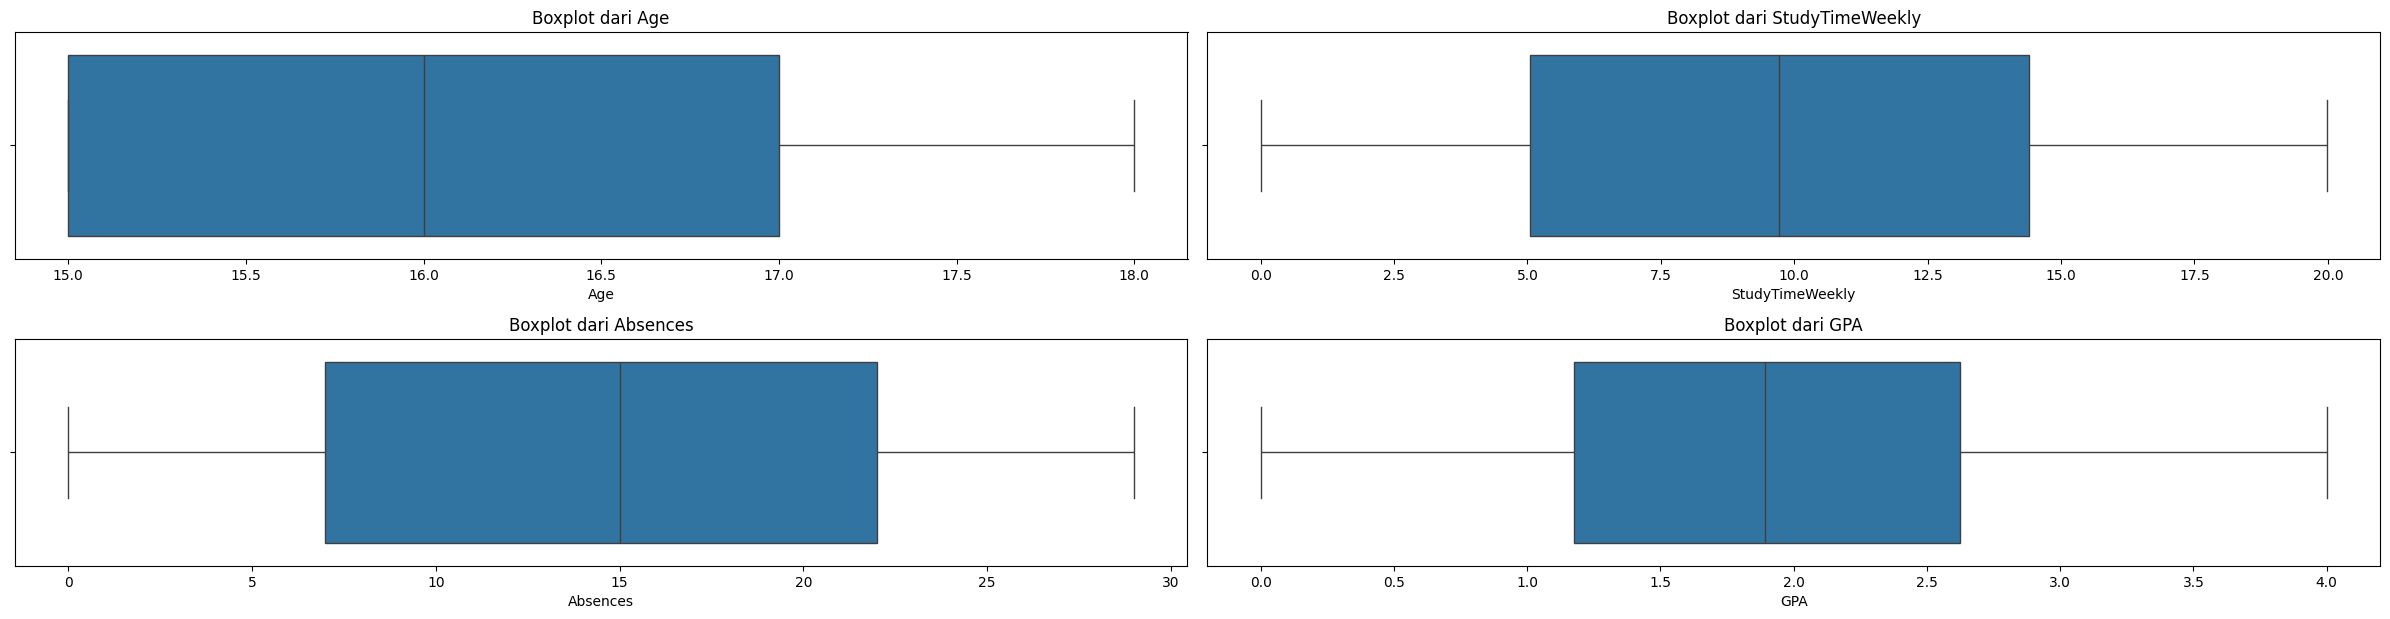

In [222]:
# Menuliskan seluruh nama kolom numerikal
columns_name = ["Age", "StudyTimeWeekly", "Absences", "GPA"]

# Membentuk plot berukuran 24 x 12
plt.figure(figsize = (24, 12))

# Membentuk plot berisi 8 subplot, dengan setiap subplot merupakan boxplot
for i in range(len(columns_name)):

    # Membentuk plot dengan subplot berukuran 4 x 2
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x = df_students[columns_name[i]])
    plt.title('Boxplot dari {}'.format(columns_name[i]))
    plt.tight_layout()

Pada grafik yang ditampilkan menunjukan visualisasi data Lama Belajar setiap minggu dengan Prestasi Siswa yang diperoleh.
1. Pada kolom Age, dapat dilihat rata-rata siswa berumur 15-17 tahun. Dapat disimpulkan tidak ada Outlier yang tersebar.
2. Pada kolom StudyTimeWeekly, dapat dilihat bahwa rata-rata siswa memiliki waktu belajar 5-14 jam per minggu.
3. Pada kolom absences, dapat dilihat bahwa rata-rata siswa memiliki jumlah ketidakhadiran 6 - 23 hari. Dapat disimpulkan 1. Pada kolom Age, dapat dilihat rata-rata siswa berumur 15-17 tahun. Dapat disimpulkan tidak ada Outlier yang tersebar.
4. Pada kolom GPA, dapat dilihat bahwa rata-rata prestasi siswa diantara 1,2 - 2,7 dan tidak memiliki outlier.

#### 5. Melihat jumlah kategori kelas terbaik pada kolom GradeClass

Pada tahap ini, ditampilkan lebih detail mengenai jumlah dari masing-masing tingkat kelas terbaik yang menjadi target kita untuk mengetahui jumlah secara umum.

In [223]:
prestasi_siswa = df_students.GradeClass.value_counts()
prestasi_siswa

,count
GradeClass,
Grade F,1211
Grade D,414
Grade C,391
Grade B,269
Grade A,107


Dari tabel kelas terbaik (GradeClass) yang ditampilkan menununjukan mayoritas prestasi siswa berada di kategori Grade F(Prestasi terendah) yakni 1211 siswa sedangkan minioritas siswa berada pada kategori Grade A (Kelas tertinggi) yakni 107

#### 5. Membuat pie chart kolom GradeClass

Pada tahap ini, kita akan melihat persebaran data dari masing-masing kategori kelas pada kolom GradeClass.

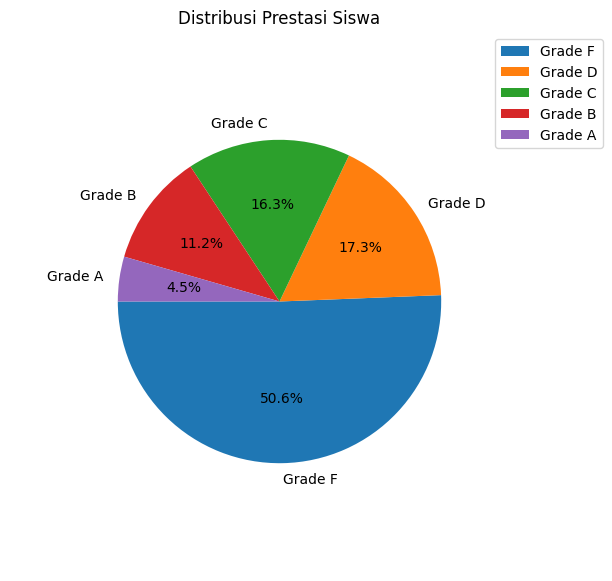

In [224]:
# Membuat variabel label dan value
label = prestasi_siswa.index.tolist()
value = prestasi_siswa.values.tolist()

# Membentuk pie chart untuk melihat persebaran data dari masing-masing tingkat berat badan
plt.figure(figsize = (7, 7))
plt.pie(value, labels = label, autopct = "%1.1f%%", startangle = 180, radius = 0.75)

# Menambahkan legend pada pie chart
plt.legend(loc = "upper center", bbox_to_anchor = (1, 1))

# Menambahkan judul pada plot
plt.title("Distribusi Prestasi Siswa")

# Menampilkan plot
plt.show()


Dari grafik diatas menunjukan ditas 50.6% siswa berada pada Grade F (kelas terendah), 4.5% siswa berada pada Grade A (kelas tertinggi). Sedangkan siswa yang lainnya berada pada Grade B (11.2%), Grade C(16.3%) dan Grade D (17.3%)

### 6. Membentuk histogram dari variabel-variabel numerikal

Pada tahap ini, akan diperlihatakan pesebaran data pada histogram semua variabel numerikal

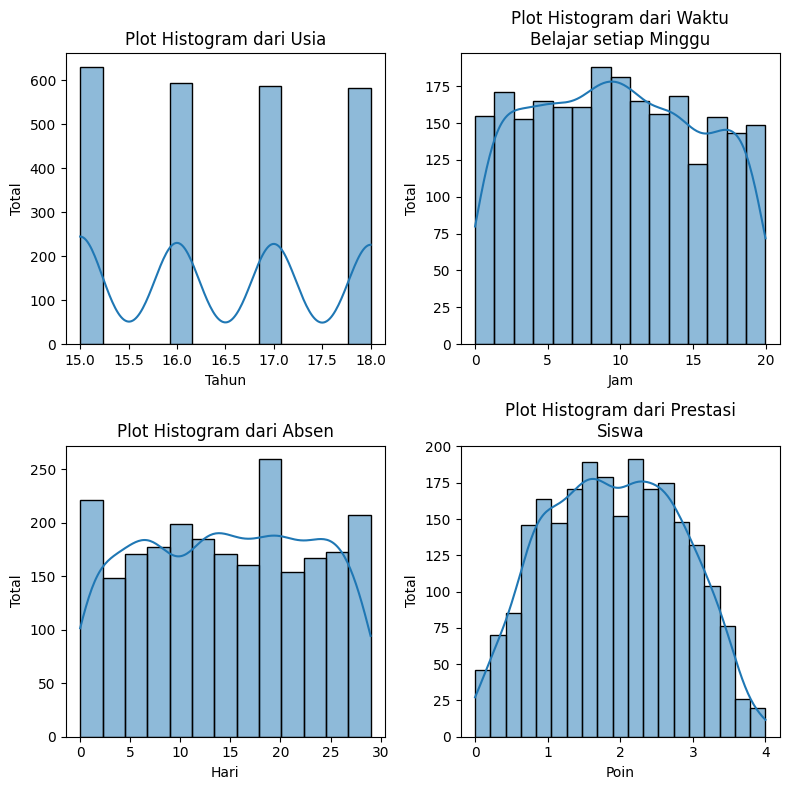

In [225]:
# Membentuk plot dengan subplot sejumlah 4 berukuran 8 x 8
fig, axes = plt.subplots(2, 2, figsize = (8, 8))

# Mengubah array multi dimensi menjadi array 1 dimensi
axes = axes.flatten()

# Menambahkan satuan dari masing-masing kolom
labels = ["Tahun", "Jam", "Hari", "Poin"]

# Fungsi untuk menghasilkan warna acak
def random_color():
    return "#%06x" % random.randint(0, 0xFFFFFF)

# Mendeskripsikan kolom-kolom numerikal yang akan digunakan
keterangan_kolom_numerikal = ["Usia",
                             "Waktu Belajar setiap Minggu",
                             "Absen",
                             "Prestasi Siswa"]

# Membentuk plot jumlah dalam bentuk histogram plot untuk masing-masing kolom
for i, kolom in enumerate(df_students[kolom_data_numerikal].columns):
    sns.histplot(data = df_students, x = kolom, kde = True, ax = axes[i])

    # Menambahkan judul untuk masing-masing plot
    judul = "\n".join(textwrap.wrap(f"Plot Histogram dari {keterangan_kolom_numerikal[i]}", width = 30))
    axes[i].set_title(judul)
    axes[i].title.set_size(12)

    # Mengatur label x
    axes[i].set_xlabel(labels[i])
    axes[i].set_ylabel("Total")

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

# Menampilkan plot
plt.show()

Berdasarkan gambar diatas, dapat dilihat bahwa plot histrogram usia, waktu belajar setiap minggu, absen dan nilai siswa cukup berdistribusi normal.

## Multivariate Analysis EDA

Pada bagian ini, akan ditunjukan hubungan antara dua variabel biasa disebut sebagai bivariate EDA. Selanjutnya, kita akan melakukan analisis data pada fitur kategori dan numerik

### 1. Ananlisis data pada fitur numerik _StudyTimeWeekly_ (Waktu belajar setiap minggu) dengan _GPA_ (Nilai Prestasi)

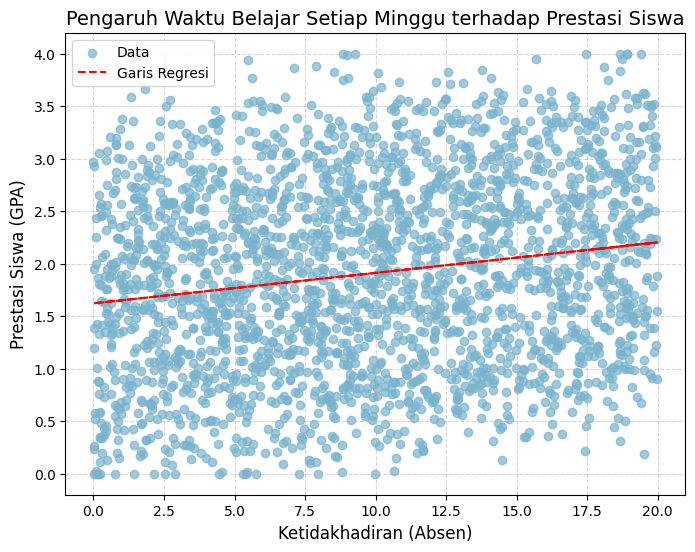

In [226]:
# Menghitung garis regresi
x = df_students['StudyTimeWeekly']
y = df_students['GPA']
m, b = np.polyfit(x, y, 1)  # Mencari slope dan intercept

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, color='#78B3CE', label='Data')

# Garis regresi
plt.plot(x, m*x + b, color='red', linestyle='--', label='Garis Regresi')

# Menambahkan label, judul, dan legenda
plt.title("Pengaruh Waktu Belajar Setiap Minggu terhadap Prestasi Siswa", fontsize=14)
plt.xlabel("Ketidakhadiran (Absen)", fontsize=12)
plt.ylabel("Prestasi Siswa (GPA)", fontsize=12)
plt.legend()
plt.grid(alpha=0.5, linestyle='--')
plt.show()

Berdasarkan gambar diatas, dilihat garis regresi bergerak dari bawah keatas menunjukan bahwa siswa yang waktu belajaranya banyak mempengaruhi naiknya prestasinya(GPA).

### 2. Ananlisis data pada fitur numerik _Absences_ (Ketidakhadiran) dengan _GPA_ (Nilai Prestasi)

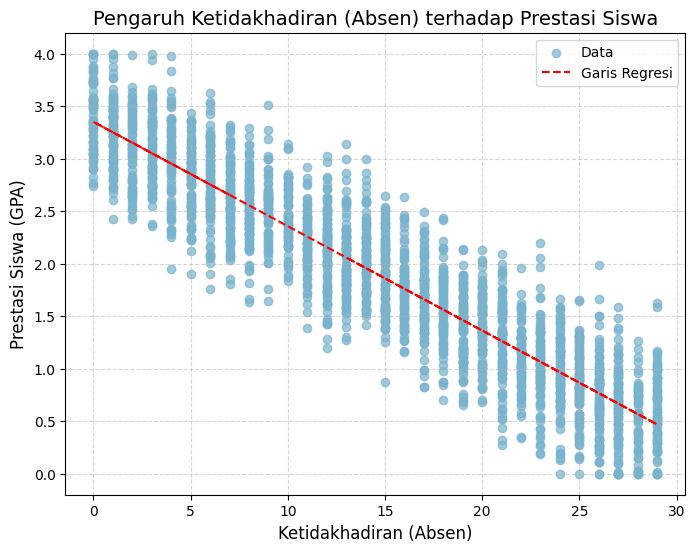

In [227]:
import numpy as np

# Menghitung garis regresi
x = df_students['Absences']
y = df_students['GPA']
m, b = np.polyfit(x, y, 1)  # Mencari slope dan intercept

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, color='#78B3CE', label='Data')

# Garis regresi
plt.plot(x, m*x + b, color='red', linestyle='--', label='Garis Regresi')

# Menambahkan label, judul, dan legenda
plt.title("Pengaruh Ketidakhadiran (Absen) terhadap Prestasi Siswa", fontsize=14)
plt.xlabel("Ketidakhadiran (Absen)", fontsize=12)
plt.ylabel("Prestasi Siswa (GPA)", fontsize=12)
plt.legend()
plt.grid(alpha=0.5, linestyle='--')
plt.show()


Berdasarkan gambar diatas, dilihat garis regresi bergerak dari atas kebawah menunjukan bahwa Absen(ketidakhadiran) siswa sangat mempengaruhi turun prestasinya(GPA).

### 3. Ananlisis data pada fitur kategori _Tutoring_ (Bimbingan Belajar) dengan _GradeClass_ (Kategori Kelas)

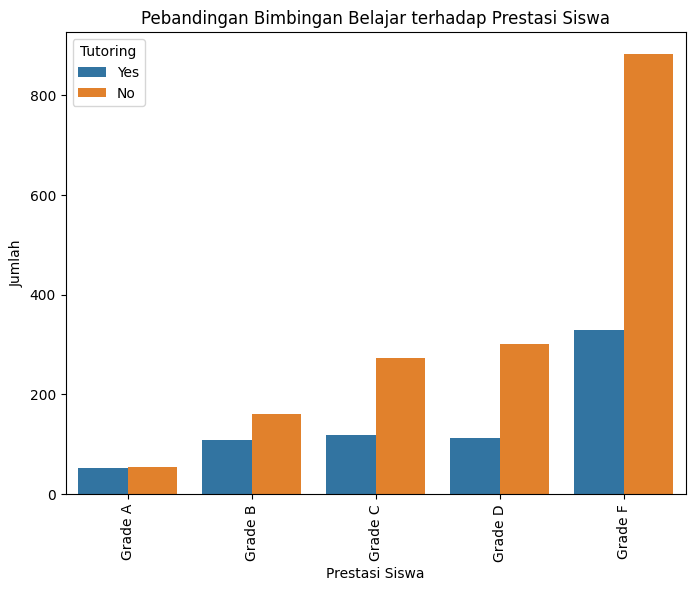

In [228]:
# Menentukan urutan Grade Class
grade_order = ['Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade F']

# Membentuk plot predikat dalam bentuk bar plot antara prestasi siswa dan waktu belajar setiap minggu
plt.figure(figsize = (8, 6))
sns.countplot(x = "GradeClass", data = df_students, hue = "Tutoring", order=grade_order)

# Menambahkan judul pada plot
plt.title("Pebandingan Bimbingan Belajar terhadap Prestasi Siswa")

# Menambahkan label sumbu x dan y pada plot
plt.xticks(rotation = 90)
plt.xlabel("Prestasi Siswa")
plt.ylabel("Jumlah")

# Menampilkan plot
plt.show()

Berdasarkan gambar diatas, dapat dilihat bahwa paling banyak siswa yang tidak mengikuti bimbingan belajar yang mendapat prestasi kelas paling rendah yakni pada kategori kelas F (Grade F)

### 4. Ananlisis data pada fitur kategori _Genre_ (Jenis Kelamin) dengan  _GradeClass_ (Kategori Kelas)

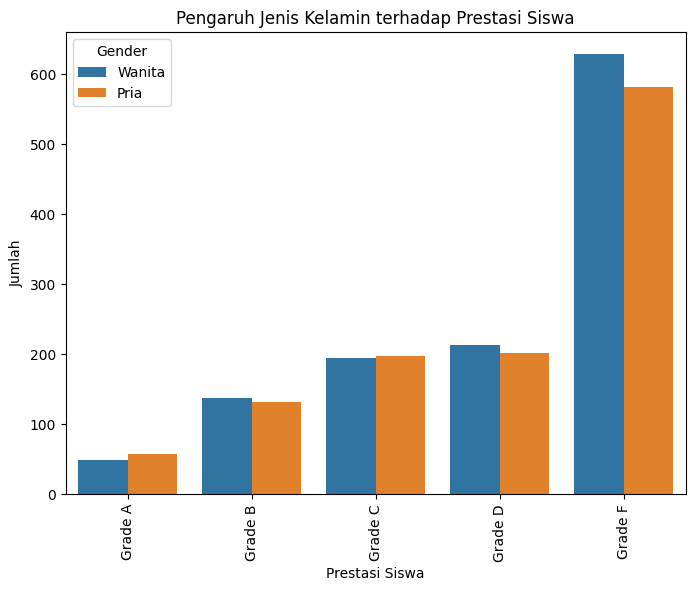

In [229]:
# Menentukan urutan Grade Class
grade_order = ['Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade F']

# Membentuk plot predikat dalam bentuk bar plot antara prestasi siswa dan waktu belajar setiap minggu
plt.figure(figsize = (8, 6))
sns.countplot(x = "GradeClass", data = df_students, hue = "Gender", order=grade_order)

# Menambahkan judul pada plot
plt.title("Pengaruh Jenis Kelamin terhadap Prestasi Siswa")

# Menambahkan label sumbu x dan y pada plot
plt.xticks(rotation = 90)
plt.xlabel("Prestasi Siswa")
plt.ylabel("Jumlah")

# Menampilkan plot
plt.show()


Berdasarkan Grafik diatas, dapat dilihat bahwa pria lebih dominan memiliki prestasi kelas lebih tinggi dibandingkan dengan wanita

### 5. Ananlisis data pada fitur kategori kegiatan non akademik (_Extracurricular_, _Sports_, _Music_, _Volunteering_) dengan _GPA_ (Nilai Prestasi)


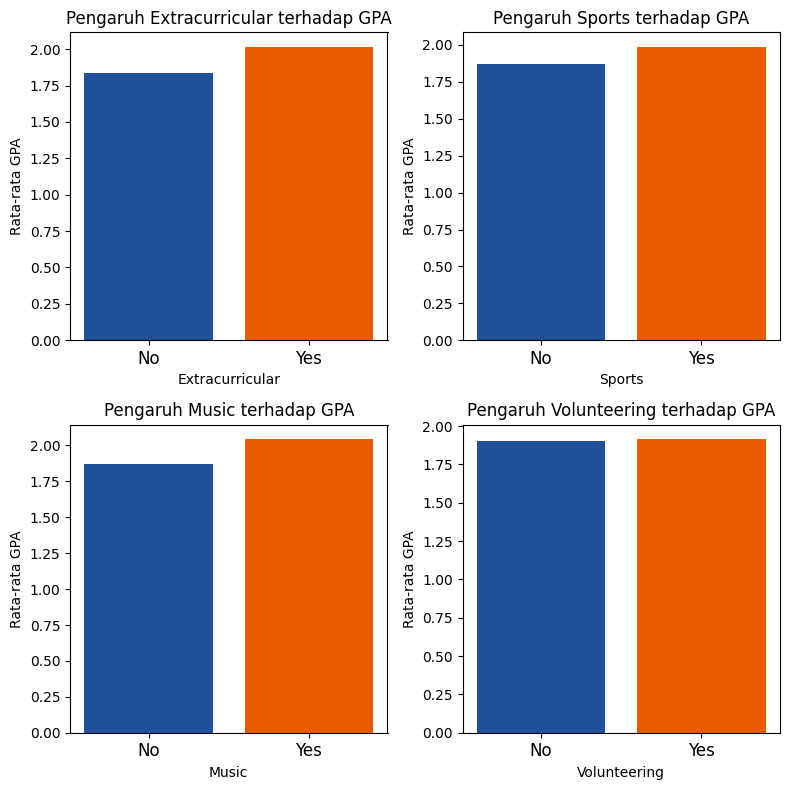

In [230]:
# Kolom yang berisi informasi kegiatan
aktivitas = ['Extracurricular', 'Sports', 'Music', 'Volunteering']

# Menghitung rata-rata GPA untuk setiap kategori kegiatan
average_gpa = {}

for kegiatan in aktivitas:
    # Grouping by kegiatan (Yes/No) dan menghitung rata-rata GPA
    avg_gpa_per_kegiatan = df_students.groupby(kegiatan, observed=False)['GPA'].mean()
    average_gpa[kegiatan] = avg_gpa_per_kegiatan

# Membuat subplots untuk menampilkan rata-rata GPA berdasarkan kegiatan
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Flat axes untuk akses yang lebih mudah
axes = axes.flatten()

# Plot setiap kategori
for i, kegiatan in enumerate(aktivitas):
    # Membuat bar plot
    axes[i].bar(average_gpa[kegiatan].index, average_gpa[kegiatan].values, color=['#1F509A', '#EB5B00'])

    # Menambahkan judul dan label
    axes[i].set_title(f"Pengaruh {kegiatan} terhadap GPA")
    axes[i].set_xlabel(kegiatan)
    axes[i].set_ylabel("Rata-rata GPA")

    # Menambahkan keterangan Yes/No pada sumbu x
    axes[i].set_xticks([0, 1])  # Mengatur posisi xticks
    axes[i].set_xticklabels(['No', 'Yes'], fontsize=12)  # Menambahkan keterangan Yes/No

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, dapat dilihat bahwa mayoritas siswa yang tidak mengikuti kegiatan ekstrakulikuler, olahraga dan musik mempengaruhi turunya nilai pretasi (GPA)  

### 6. Ananlisis data pada fitur kategori _ParentalSupport_ (Dukungan Orang Tua) dengan _GradeClass_ (Kategori Kelas)

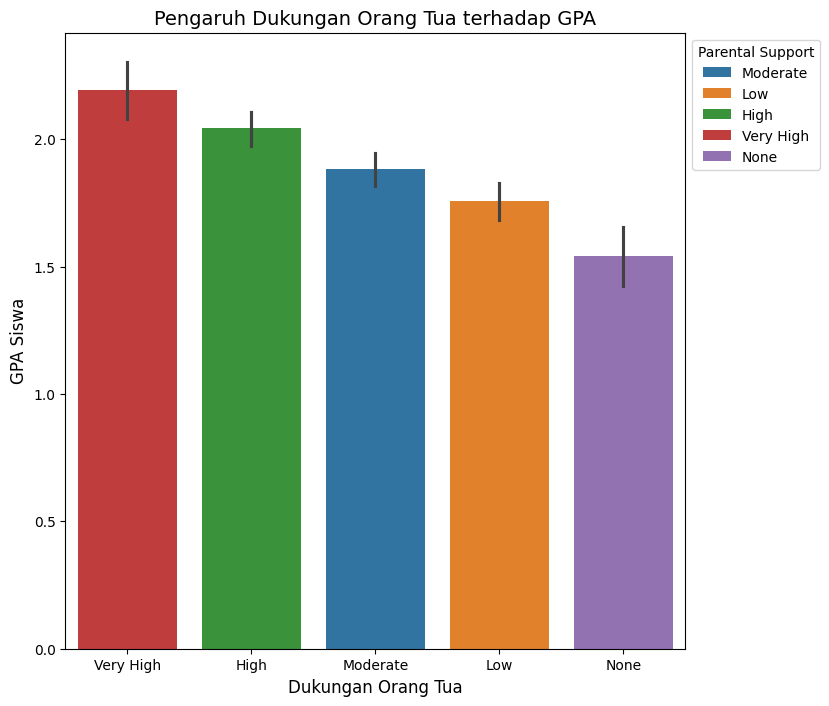

In [231]:
# Menentukan urutan Grade Class
grade_order = ['Very High', 'High', 'Moderate', 'Low', 'None']

# Membuat Box Plot untuk pengaruh dukungan orang tua terhadap GPA
plt.figure(figsize=(8, 8))
sns.barplot(x='ParentalSupport', y='GPA', data=df_students, hue='ParentalSupport', order=grade_order, legend=True)

# Menambahkan legend (jika diperlukan untuk hue atau tambahan kategori)
legend = plt.legend(title="Parental Support", loc='upper left', bbox_to_anchor=(1, 1))

# Menambahkan judul dan label
plt.title("Pengaruh Dukungan Orang Tua terhadap GPA", fontsize=14)
plt.xlabel("Dukungan Orang Tua", fontsize=12)
plt.ylabel("GPA Siswa", fontsize=12)

# Menampilkan plot
plt.show()

Berdasarkan grafik diatas, dapat dilihat bahwa dukungan orang tua sangat mempengaruhin nilai prestasi siswa (GPA). Semakin tinggi dukungan orang tua, maka semakin meningkat nilai prestasi dari anaknya.

### 7. Melihat korelasi variabel numerik dengan menggunakan _Heatmap_

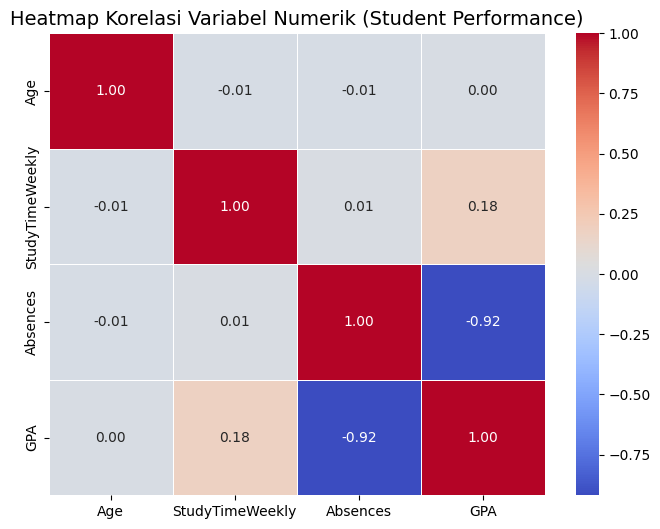

In [232]:
# Menghitung matriks korelasi hanya untuk kolom numerik
numerical_corr_matrix = df_students[kolom_data_numerikal].corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    numerical_corr_matrix,
    annot=True,          # Menampilkan nilai korelasi di dalam heatmap
    fmt=".2f",           # Format angka dua desimal
    cmap="coolwarm",     # Warna biru untuk korelasi negatif, merah untuk positif
    linewidths=0.5,      # Garis antar sel dalam heatmap
    cbar=True            # Menampilkan color bar
)

# Menambahkan judul
plt.title("Heatmap Korelasi Variabel Numerik (Student Performance)", fontsize=14)

# Menampilkan heatmap
plt.show()

Berdasarkan gambar diatas, dapat diliha bahwa:
1. Korelasi negatif yang cukup kuat dengan ketidakhadiran(Absences).
2. Korelasi positif yang cukup lemah dengan waktu belajar setiap minggu(StudyTimeWeekly).

### 8. Melihat _Plot Scatter_ yang Memiliki Nilai Korelasi Positif dan Negatif

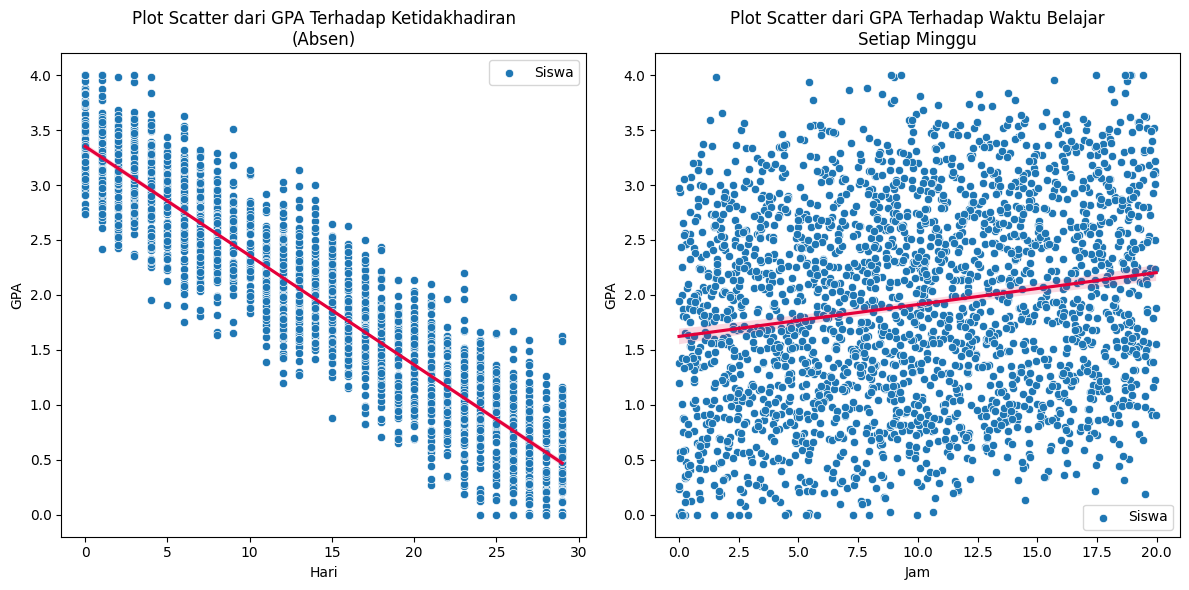

In [233]:
# Membentuk plot dengan subplot sejumlah 4 berukuran 2 x 2
fig, axes = plt.subplots(1, 2, figsize = (12,6))

# Mengubah array multi dimensi menjadi array 1 dimensi
axes = axes.flatten()

# Menambahkan satuan dari masing-masing kolom
labels = ["Hari", "Jam"]

# Membentuk dictionary dari variabel yang memiliki nilai korelasi lebih dari / sama dengan 0.2
data_x = {0: "Absences", 1: "StudyTimeWeekly"}

# Mendeskripsikan kolom-kolom numerikal yang akan digunakan berdasarkan data map negatif
deskripsi_kolom = ["Ketidakhadiran (Absen)",
                   "Waktu Belajar Setiap Minggu"]

# Membentuk plot scatter untuk masing-masing kolom beserta garis trend
for keys, values in data_x.items():
    sns.scatterplot(data = df_students, x = values, y = "GPA", ax = axes[keys], label='Siswa')
    sns.regplot(data = df_students, x = values, y = "GPA", scatter = False, ax = axes[keys], color=  "#E4003A", label="Garis Regresi")

    # Menambahkan judul untuk masing-masing plot
    judul = "\n".join(textwrap.wrap(f"Plot Scatter dari GPA Terhadap {deskripsi_kolom[keys]}", width = 50))
    axes[keys].set_title(judul)
    axes[keys].title.set_size(12)

    # Menambahkan label sumbu x dan y pada plot
    axes[keys].set_xlabel(labels[keys])
    axes[keys].set_ylabel("GPA")

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

# Menampilkan plot
plt.show()

Dari gambar plot diatas, dapat dilihat bahwa korelasi negatif yang kuat pada ketidakhadiran (garis regresi menurun ke kanan bawah) dan korelatif positif cukup lemah pada waktu belajar setiap minggu (garis regresi naik ke kanan atas)

#  D. Data Preparation

Pada tahap ini kita akan melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Ada beberapa tahap persiapan data perlu dilakukan, yaitu
1. Drop kolom yang tidak digunakan dalam pemrosesan data
2. Encoding fitur kategori
4. Pembagian dataset dengan fungsi train_test_split dari library sklearn.

### 1. Drop kolom yang tidak digunakan dalam pemrosesan data

Pada tahap ini ada beberapa kolom pada dataset yang tidak perlu digunakan dalam pemrosesan data yakni `StudentID`, `Ethnicity` dan `ParentalEducation`. Kolom-kolom ini akan dihapus menggunakan fungsi drop()

In [234]:
df_students = df_students.drop(columns = ["StudentID"])
df_students = df_students.drop(columns = ["Ethnicity"])
df_students = df_students.drop(columns = ["ParentalEducation"])

Selnjutnya, kita akan mengecek informasi data siswa terbaru menggunakan fungsi info()

In [235]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              2392 non-null   int64  
 1   Gender           2392 non-null   object 
 2   StudyTimeWeekly  2392 non-null   float64
 3   Absences         2392 non-null   int64  
 4   Tutoring         2392 non-null   object 
 5   ParentalSupport  2392 non-null   object 
 6   Extracurricular  2392 non-null   object 
 7   Sports           2392 non-null   object 
 8   Music            2392 non-null   object 
 9   Volunteering     2392 non-null   object 
 10  GPA              2392 non-null   float64
 11  GradeClass       2392 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 224.4+ KB


Hasil diatas menampilkan variabel kolom `StudentID`, `Ethnicity` dan `ParentalEducation` sudah terhapus. Dataset siswa yang akan kita proses saat ini terdiri dari 2 tipe data float64, 2 tipe data int64 dan 8 tipe data objek(string).

### 2. Encoding Fitur Kategori

Pada bagian ini, karena dataset fitur kategori kita sebelumnya sudah diubah dalam bentuk objek (string) pada tahap eksplorasi data analis maka kita perlu mengubah data kategori (yang berbentuk teks atau label) menjadi format numerik agar dapat diproses oleh algoritma machine learning.
Encoding Fitur Kategorikal dilakukan 3 bagian, yakni:
1. *Label Encoding* berfungsi untuk mengonversi nilai kategori menjadi angka integer (0 dan 1)). Variabel yang akan diproses yakni:<br>
  a. `Tutoring` (Apakah siswa mengikuti bimbingan belajar?) <br>
  b. `Extracurricular` (Apakah siswa mengikuti kegiatan ektrakulikuler?) <br>
  c. `Sports` (Apakah siswa mengikuti kegiatan olahraga? <br>
  d. `Music` (Apakah siswa mengikuti kegiatan musik?) <br>
  e. `Volunteering` (Apakah siswa mengikuti kegiatan sukarelaan?)
2. *One Hot Ecoding* berfungsi untuk mengubah setiap kategori menjadi kolom biner terpisah untuk data tidak terurut). Variabel yang akan diproses yakni `Gender`.
3. *Ordinal Encoding* berfungsi untuk memberikan nilai integer berdasarkan hierarki atau urutan kategori. Variabel yang akan diproses yakni `ParentalSupport`.

Langkah pertama kita lakukan firtur kategori *Label Encoding*

In [236]:
# Membuat list kolom-kolom kategorikal yang memiliki entri antara yes dan no
ek = ["Tutoring", "Extracurricular", "Sports", "Music", "Volunteering"]

# Mengubah nilai yes menjadi 1 dan nilai no menjadi 0 pada seluruh kolom tersebut
for k in ek:
    df_students[k] = df_students[k].map({"Yes": 1, "No": 0})

Langkah pertama kita lakukan firtur kategori *One hot Encoding*, karena kategori ini tidak memiliki urutan tertentu

In [237]:
# Membentuk kolom dummy dari kolom Gender
data_encoded = pd.get_dummies(df_students[["Gender"]], drop_first = True)

# Menggabungkan data asli dengan data dummy yang telah dibuat
df_students = pd.concat([df_students, data_encoded], axis = 1)

# Menghapus kolom Gender
df_students.drop(columns = ["Gender"], inplace = True)

Langkah pertama kita lakukan firtur kategori *Ordinal Enncoding* pada varibel`ParentalSupport` (Dukungan Orang Tua) karena kategori ini memiliki urutan yaitu ['None', 'Low', 'Moderate', 'High', 'Very High']

In [238]:
# Mendefinisikan urutan encoding
encoding_mapping = {'Very High':4, 'High':3, 'Moderate':2, 'Low':1, 'None':0}

# Lakukan encoding
df_students['ParentalSupport'] = df_students['ParentalSupport'].map(encoding_mapping)

# Menampilkan 5 baris pertama dari data setelah dilakukan data preprocessing
df_students.head()

,Age,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Gender_Wanita
0,17,19.833723,7,1,2,0,0,1,0,2.929196,Grade C,True
1,18,15.408756,0,0,1,0,0,0,0,3.042915,Grade B,False
2,15,4.210570,26,0,2,0,0,0,0,0.112602,Grade F,False
3,17,10.028829,14,0,3,1,0,0,0,2.054218,Grade D,True
4,17,4.672495,17,1,3,0,0,0,0,1.288061,Grade F,True


### Train-Test-Split

Langkah awal, karena target kita adalah variabel GradeClass untuk mengetahui akurasi prediksi dari kategori kelas prestasi terbaik, maka kita akan membuang kolom tersebut dari data dan assign kolom tersebut ke variabel baru.

In [239]:
# Menyiapkan fitur (X) dan target (y)
x = df_students.drop('GradeClass',axis=1)
y = df_students['GradeClass']  # Target (variabel yang diprediksi)

Selanjutnya kita membagi data menjadi 2, yaitu
Data training sebesar 80% untuk melatih model
Data testing sebesar 20% untuk menguji model

In [240]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,shuffle=True,random_state=15)

Langkah selanjutnya kita akan menampilkan ukuran data training dan testing kita yang telah kita bagi.

In [241]:
# Menampilkan ukuran data training dan testing dari X dan y
print("Ukuran x_train: ", x_train.shape)
print("Ukuran x_test: ", x_test.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran y_test: ", y_test.shape)

Ukuran x_train:  (1913, 11)
Ukuran x_test:  (479, 11)
Ukuran y_train:  (1913,)
Ukuran y_test:  (479,)


setelah itu, kita melihat data training dat data testing kita

In [242]:
# Menampilkan 5 baris pertama dari data training X
x.head()

,Age,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Gender_Wanita
0,17,19.833723,7,1,2,0,0,1,0,2.929196,True
1,18,15.408756,0,0,1,0,0,0,0,3.042915,False
2,15,4.210570,26,0,2,0,0,0,0,0.112602,False
3,17,10.028829,14,0,3,1,0,0,0,2.054218,True
4,17,4.672495,17,1,3,0,0,0,0,1.288061,True


Berdasarkan data fitux (x) yang ditampilkan, terlihat data target kita GradeClass sudah terhapus dan disimpan pada variabel target (y).

Kemudian, kita melihat jumlah masing-masing *GradeClass* (Kategori Kelas) pada data testing untuk selanjutnya ditransformasikan menggunakan `LabelEncoder()`. `LabelEncoder()` berfungsi untuk memetakan setiap kategori unik dalam kolom  *GradeClass* menjadi angka integer mulai dari `0`

In [243]:
# Menampilkan nilai-nilai dan jumlah dari variabel target
original_labels = y_test.value_counts()
original_labels

,count
GradeClass,
Grade F,243
Grade D,83
Grade C,78
Grade B,54
Grade A,21


In [244]:
# Membentuk encoding ordinal dengan LabelEncoder
le = LabelEncoder()

# Melakukan fitting terhadap data training dan mentransformasikan data training dan testing
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# E. Model Development

Pada bagian ini, kita akan membangun 4 model machine learning untuk menguji sebarapa baik akurasi model, sehingga model tersebut yang disarankan untuk memprediksi prestasi siswa.

## 1. Model Development dengan Random Forest

1. Langkah pertama kita melatih model dengan algoritma random forest dengan memanggil fungsi RandomForestClassifier. Parameter yang digunakan yaitu:
  * `criterion="entropy"`, model akan memilih split (pembagian) yang memaksimalkan Information Gain, yaitu pengurangan entropi setelah split
  * `max_depth`, untuk mengontrol kedalaman maksimum setiap pohon keputusan dengan nilai 6
  * `n_estimators`, untuk menentukan jumlah iterasi _boosting_ (pohon keputusan)
  * `random_state`, untuk mengontrol hasil acak selama pelatihan model

In [245]:
# Memanggil fungsi RandomForestClassifier dari library sklearn
model_rf = RandomForestClassifier(n_estimators = 200, criterion = "entropy", max_depth = 10, random_state = 50)

# Melatih model Random Forest dengan data training pada X dan y
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=50)

2. Langka berikutnya kita akan memprediksi dan melihat akurasi model yang telah dilatih

In [246]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
y_pred_rf = model_rf.predict(x_test)

# Evaluasi Model
print("Akurasi pada data uji:", accuracy_score(y_test, y_pred_rf))

Akurasi pada data uji: 0.9269311064718163


Dari hasil yang diperoleh menunjukan model yang dibangun menggunakan algoritma Random Forest (RF) memperoleh akurasi 0.9269 (92.69%)

## 2. Model Development dengan Extreme Gradient Boosting (XGBoost)

1. Langkah pertama kita melatih model dengan Extreme Gradient Boosting (XGBoost) dengan memanggil fungsi XGBClassifier. Parameter yang digunakan yakni:
  * `max_depth`, untuk mengontrol kedalaman maksimum setiap pohon keputusan dengan nilai 6
  * `n_estimators`, untuk menentukan jumlah iterasi _boosting_ (pohon keputusan)
  * `random_state`, untuk mengontrol hasil acak selama pelatihan model
  * `learning_rate`, untuk menentukan seberapa besar kontribusi setiap pohon terhadap model akhir
  * `n_jobs`, untuk menggunakan semua CPU yang tersedia.

In [247]:

# Memanggil fungsi XGBClassifier dari library sklearn
model_xgb = XGBClassifier(max_depth = 6, n_estimators = 125,
                          random_state = 30, learning_rate = 0.01, n_jobs = -1)

# Melatih model XGBoost dengan data training pada X dan y
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

2. Langka berikutnya kita akan memprediksi dan melihat akurasi model yang telah dilatih

In [248]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
y_pred_xgb = model_xgb.predict(x_test)

# Evaluasi Model
print("Akurasi pada data uji:", accuracy_score(y_test, y_pred_xgb))

Akurasi pada data uji: 0.9331941544885177


Dari hasil yang diperoleh menunjukan model yang dibangun menggunakan algoritma Extreme Gradient Boosting (XGBoost) memperoleh akurasi 0.9311 (93.11%)

## 3. Model Development dengan Support Vector Machine (SVM)

1. Langkah pertama kita melatih model dengan Support Vector Machine (SVM) dengan memanggil fungsi SVC. Parameter yang dipakai yaitu:
  * `kernel='rbf'` dengan nilai parameternya `rbf`, dimana `rbf` (_Kernel Radial Basis Function_) ini cocok untuk data yang kompleks.
  * `gamma` dengan nilai default `auto` karena cocok untuk dataset yang kecil dan seragam.
  * `random_state=50`,artinya selama pelatihan data akan diacak sama sebanyak 50 kali.

In [249]:
# Memanggil fungsi SVC dari library sklearn
model_svm = SVC(kernel = 'rbf', gamma = 'auto', random_state = 50)

# Melatih model SVM dengan data training pada X dan y
model_svm.fit(x_train, y_train)

SVC(gamma='auto', random_state=50)

2. Langka berikutnya kita akan memprediksi dan melihat akurasi model yang telah dilatih

In [250]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
y_pred_svm = model_svm.predict(x_test)

# Evaluasi Model
print("Akurasi pada data uji:", accuracy_score(y_test, y_pred_svm))

Akurasi pada data uji: 0.7807933194154488


Dari hasil yang diperoleh menunjukan model yang dibangun menggunakan algoritma  Support Vector Machine (SVM) memperoleh akurasi 0.7807 (78.07%)

## 4. Model Development dengan Naive Bayes

1. Langkah pertama kita melatih model dengan Naive Bayes dengan memanggil fungsi GaussianNB() dengan parameter `var_smoothing=1e-9`. `var_smoothing` berfungsi menambahkan nilai kecil (var_smoothing) ke varians dari setiap fitur. Sedangkan Nilai `1e-9` adalah representasi ilmiah untuk angka 0.000000001 (atau `10⁻⁹`). Ini digunakan untuk menambahkan nilai kecil pada varians, sehingga tidak ada nilai varians yang terlalu kecil untuk menghasilkan masalah numerik.

In [251]:
# Membuat model dengan parameter khusus
model_nb = GaussianNB(var_smoothing=1e-9)

# Melatih model
model_nb.fit(x_train, y_train)

GaussianNB()

2. Langka berikutnya kita akan memprediksi dan melihat akurasi model yang telah dilatih

In [252]:
# Memprediksi hasil menggunakan data testing berdasarkan model yang telat dilatih
y_pred_nb = model_nb.predict(x_test)

# Evaluasi Model
print("Akurasi pada data uji:", accuracy_score(y_test, y_pred_nb))

Akurasi pada data uji: 0.7933194154488518


Dari hasil yang diperoleh menunjukan model yang dibangun menggunakan algoritma Naive Bayes memperoleh akurasi 0.7933 (79.33%)

# F. Evaluasi Model

## 1. Penerapan Matriks Confusion, Akurasi, dan Skor f1 untuk membandingkan Hasil Prediksi dengan Data Asli

Pertama kita inisialsi array models berisi hasil prediksi setiap model

In [253]:
# Daftar model dan hasil prediksi
models = {
    'Random Forest': y_pred_rf,
    'XGBoost' : y_pred_xgb,
    "SVM": y_pred_svm,
    "Naive Bayes": y_pred_nb
}

Kedua, kita melihat rangkuman (*report*) dari metrik evaluasi kinerja model klasifikasi yang mencakup metrik-metrik seperti precision, recall, F1-score, dan support untuk setiap kelas dalam dataset

In [254]:
# Membuat list nama target yang diinginkan
nama_target = ['Grade A',
               'Grade B',
               'Grade C',
               'Grade D',
               'Grade F']

In [255]:
for i, (model_name, y_pred) in enumerate(models.items()):
  print("\nClassification Report "+model_name+":\n", classification_report(y_test, y_pred, target_names = nama_target))


Classification Report Random Forest:
               precision    recall  f1-score   support

     Grade A       0.87      0.62      0.72        21
     Grade B       0.87      0.87      0.87        54
     Grade C       0.92      0.92      0.92        78
     Grade D       0.92      0.88      0.90        83
     Grade F       0.94      0.98      0.96       243

    accuracy                           0.93       479
   macro avg       0.91      0.86      0.88       479
weighted avg       0.93      0.93      0.93       479


Classification Report XGBoost:
               precision    recall  f1-score   support

     Grade A       0.89      0.76      0.82        21
     Grade B       0.92      0.89      0.91        54
     Grade C       0.94      0.92      0.93        78
     Grade D       0.91      0.88      0.90        83
     Grade F       0.94      0.98      0.96       243

    accuracy                           0.93       479
   macro avg       0.92      0.89      0.90       479
weigh

Selanjutnya, kita bandingkan hasil prediksi dengan data asli dengan menampilkan pada headmap grafik (Matriks Confusion)

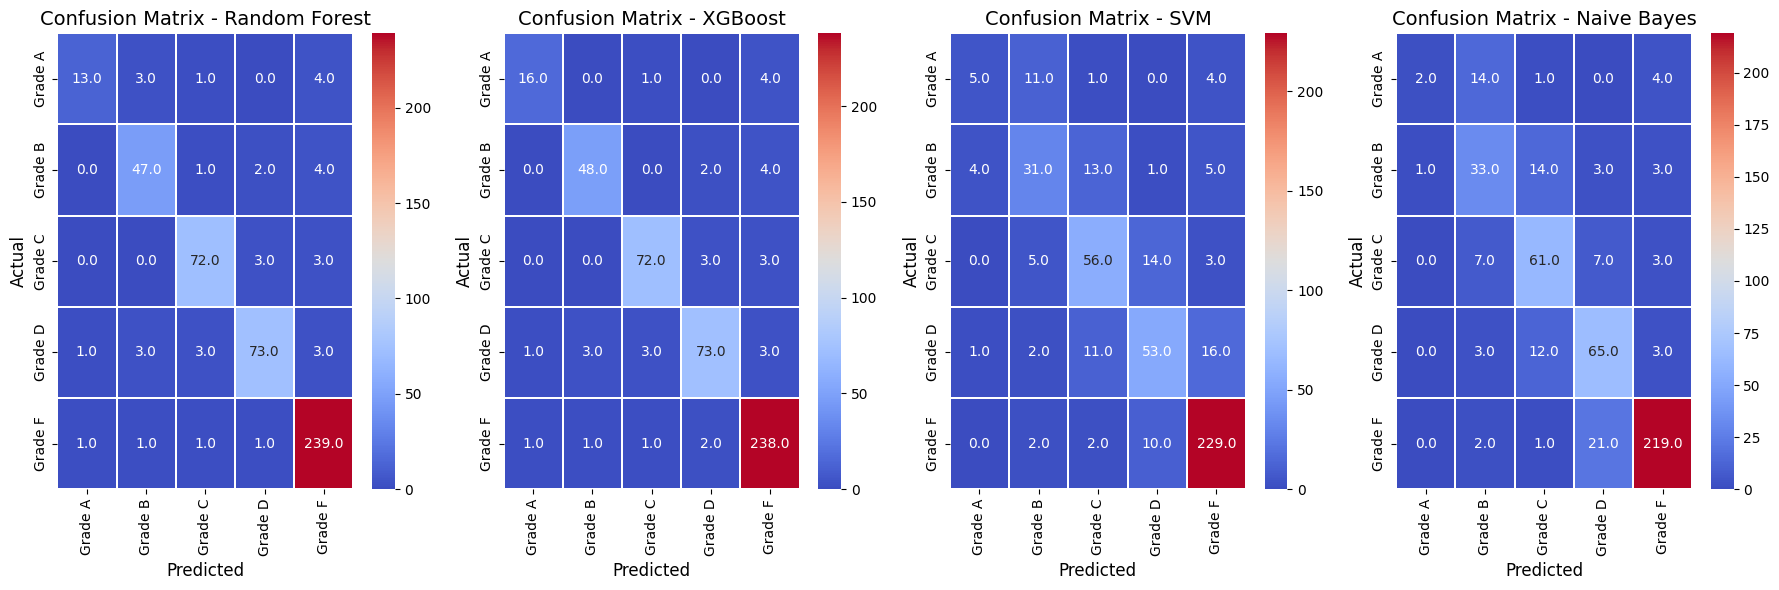

In [256]:
# Visualisasi Confusion Matrices
plt.figure(figsize=(18,6))

for i, (model_name, y_pred) in enumerate(models.items()):
    # Hitung Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plot Confusion Matrix
    plt.subplot(1, len(models), i + 1)
    sns.heatmap(
        cm,  # Data matriks korelasi
        annot=True,             # Menampilkan nilai dalam kotak
        fmt=".1f",              # Format angka
        cmap="coolwarm",        # Skema warna
        linewidths=0.2,         # Garis pembatas antar kotak
        xticklabels=nama_target,# Set nama label x
        yticklabels=nama_target,# Set nama label y
        cbar = True
    )
    plt.title(f"Confusion Matrix - {model_name}", fontsize=14)
    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Actual", fontsize=12)


# Tampilkan semua plot
plt.tight_layout()
plt.show()


Berdasarkan rangkuman (*report*) dan headmap grafik (Matriks Confusion), maka diperoleh:<br>
1. Akurasi model Random Forest sebesar <b>0.9269</b> atau <b>92.69%</b>. Dari confusion matrix, model sedikit salah mengklasifikasi karena terdapat 8 data yang diprediksi salah pada Grade A dan 14 data yang diprediksi salah pada Grade F

2. Akurasi model XGBoots sebesar <b>0.9332</b> atau <b>93.32%</b>. Dari confusion matrix, model sedikit salah mengklasifikasi karena terdapat 5 data yang diprediksi salah pada Grade A dan 15 data yang diprediksi salah pada Grade F

3. Akurasi model Support Vector Machine sebesar <b>0.7808</b> atau <b>78.08%</b>. Dari confusion matrix, model banyak salah mengklasifikasi terdapat 16 data yang diprediksi salah pada Grade A dan 28 data yang diprediksi salah pada Grade F.

4. Akurasi model Naive Bayes sebesar <b>0.7933</b> atau <b>79.33%</b>. Dari confusion matrix, model banyak salah mengklasifikasi terdapat 19 data yang diprediksi salah pada Grade A dan 13 data yang diprediksi salah pada Grade F.

## 2. Melihat perbandingan akurasi model dengan grafik barplot

In [257]:
models = {
    'Random Forest': model_rf,
    'XGBoost': model_xgb,
    'Support Vector Machine': model_svm,
    'Naive Bayes': model_nb
}

Random Forest accuracy: 0.9269
XGBoost accuracy: 0.9332
Support Vector Machine accuracy: 0.7808
Naive Bayes accuracy: 0.7933


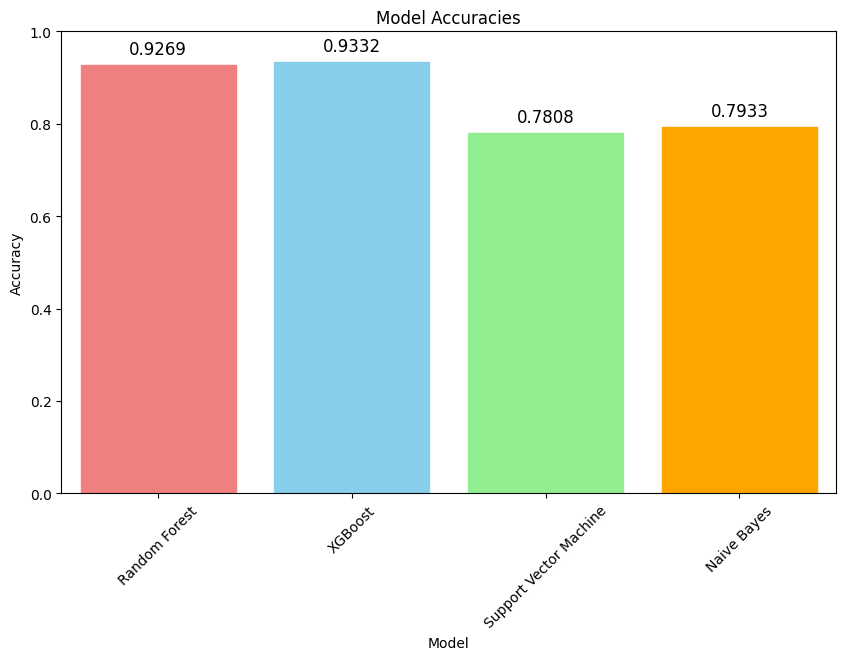

In [258]:
model_names = []
accuracies = []

# Train and evaluate each model
for name, clf in models.items():
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.4f}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot( x='Model', y='Accuracy', data=df_models, legend=False)

# Mengubah warna batang secara manual
colors = ['lightcoral', 'skyblue', 'lightgreen', 'orange']  # List warna berbeda untuk setiap batang

for i, p in enumerate(ax.patches):
    p.set_color(colors[i])  # Mengubah warna setiap batang

# Menambahkan nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}',  # Menampilkan nilai
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi (tengah atas batang)
                ha='center', va='bottom',  # Horizontal center dan vertical top
                fontsize=12, color='black',  # Ukuran font dan warna
                xytext=(0, 5),  # Offset label untuk di atas batang
                textcoords='offset points')

plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

Dari grafik barplot yang ditampilkan, terlihat bahwa model menggunakan algoritma Extreme Gradient Boosting (XGBoost) lebih tinggi akurasinya yakni 0.9311 dibandingkan dengan ketiga model yakni Naive Bayes = 0.7933, Random Forest = 0.9269 dan Support Vecor Machine = 0.7808 untuk memprediksi peforma siswa berdasarkan prestasi kelas terbaik.